In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
#https://www.kaggle.com/datasets/tanshihjen/early-stage-diabetes-risk-prediction
dataset = pd.read_csv('/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv') 

In [3]:
#this data set is balanced? (No.)
positive_cases = len(dataset[dataset['class'] == 'Positive'])
positive_cases

320

In [4]:
negative_cases = len(dataset[dataset['class'] == 'Negative'])
negative_cases

200

In [5]:
y = dataset['class']
x = dataset.drop(columns=['class'])

In [6]:
#data before pre processing
for col in x.columns:
    print('column variable name:', col)
    print("possible values:", dataset[col].unique())
    print()

column variable name: Age
possible values: [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]

column variable name: Gender
possible values: ['Male' 'Female']

column variable name: Polyuria
possible values: ['No' 'Yes']

column variable name: Polydipsia
possible values: ['Yes' 'No']

column variable name: sudden weight loss
possible values: ['No' 'Yes']

column variable name: weakness
possible values: ['Yes' 'No']

column variable name: Polyphagia
possible values: ['No' 'Yes']

column variable name: Genital thrush
possible values: ['No' 'Yes']

column variable name: visual blurring
possible values: ['No' 'Yes']

column variable name: Itching
possible values: ['Yes' 'No']

column variable name: Irritability
possible values: ['No' 'Yes']

column variable name: delayed healing
possible values: ['Yes' 'No']

column variable name: partial paresis
possible values: ['No' 'Yes']

column v

In [46]:
y = dataset['class']
x = dataset.drop(columns=['class'])

In [47]:
values = {'Yes':1, 'No':0}
gender = {'Male': 1, 'Female': 0}

In [48]:
for i in x.columns[2:]:
    x[i] = x[i].map(values)
x['Gender'] = x['Gender'].map(gender)

In [49]:
mean_age = x['Age'].mean()
std_age = x['Age'].std()

x['Age'] = (x['Age'] - mean_age) / std_age

In [50]:
#data after pre-processing
for col in x.columns:
    print('column variable name:', col)
    print("possible values:", x[col].unique())
    print()

column variable name: Age
possible values: [-6.60730661e-01  8.20572090e-01 -5.78436063e-01 -2.49257674e-01
  9.85161284e-01  5.73688298e-01  7.38277493e-01  1.47892887e+00
  1.56122347e+00  1.80810726e+00 -3.31552272e-01 -8.25319855e-01
 -1.07220365e+00  1.06745588e+00  4.91393701e-01 -4.13846869e-01
  1.14975048e+00 -7.43025258e-01 -2.37388261e-03 -1.31908744e+00
 -4.96141466e-01  3.26804506e-01  4.09099104e-01 -9.07614452e-01
  7.99207146e-02  1.23204508e+00 -1.48367663e+00  1.62215312e-01
 -1.66963077e-01 -9.89909050e-01  2.44509909e-01  9.02866687e-01
  1.39663427e+00 -1.89514962e+00 -8.46684799e-02 -1.64826583e+00
  1.64351806e+00  6.55982895e-01 -1.40138204e+00  3.04252622e+00
  3.45399920e+00  1.97269645e+00  1.72581266e+00  2.54875863e+00
 -1.15449824e+00 -2.63580099e+00 -1.23679284e+00  1.31433967e+00
 -1.73056042e+00 -1.56597123e+00 -1.81285502e+00]

column variable name: Gender
possible values: [1 0]

column variable name: Polyuria
possible values: [0 1]

column variable na

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2) #save part of data to test the algorithms after training and validation

In [13]:
#grid search for random forest
params = {'n_estimators':[1, 10, 25, 50, 100, 500, 1000, 3000, 5000],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [2, 3, 4, 5, 6],
          'min_samples_split': [1, 2, 3]}

RFC = RandomForestClassifier()

grid = GridSearchCV(estimator=RFC, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_test, y_test)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [1, 10, 25, 50, 100, 500, 1000, 3000,
                                          5000]},
             scoring='roc_auc', verbose=1)

In [14]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 3,
 'n_estimators': 25}

In [20]:
RFC = RandomForestClassifier(criterion=grid.best_params_['criterion'],
                             max_depth=grid.best_params_['max_depth'],
                             min_samples_split=grid.best_params_['min_samples_split'],
                             n_estimators=grid.best_params_['n_estimators'])

RFC.fit(X_train, y_train)
RFC.score(X_test, y_test)

0.9326923076923077

In [38]:
for importance, colunm in zip(RFC.feature_importances_, x.columns):
    print('Feature:', colunm)
    print('Importance: ', importance)
    print()

Feature: Age
Importance:  0.04677143277275197

Feature: Gender
Importance:  0.09500245853707727

Feature: Polyuria
Importance:  0.28749587733640075

Feature: Polydipsia
Importance:  0.2718864535135438

Feature: sudden weight loss
Importance:  0.08097847161094682

Feature: weakness
Importance:  0.007771799213839094

Feature: Polyphagia
Importance:  0.029170088863727246

Feature: Genital thrush
Importance:  0.0128284044426175

Feature: visual blurring
Importance:  0.011842943044487839

Feature: Itching
Importance:  0.016293679746801248

Feature: Irritability
Importance:  0.022896757464896576

Feature: delayed healing
Importance:  0.015522816801662849

Feature: partial paresis
Importance:  0.04705202523457361

Feature: muscle stiffness
Importance:  0.010034504418001569

Feature: Alopecia
Importance:  0.04088579689524769

Feature: Obesity
Importance:  0.0035664901034241137



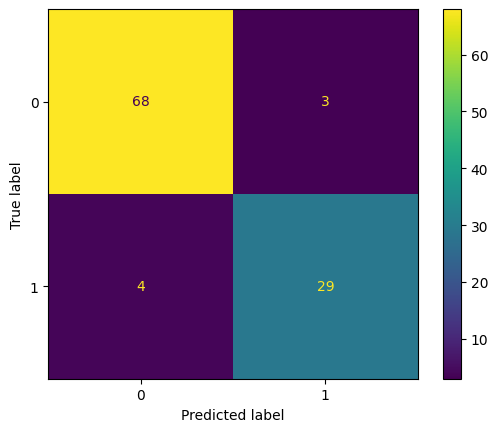

In [39]:
confusion_matrix = [[0, 0],
                    [0, 0]]

for x, y in zip(RFC.predict(X_test), y_test):
    if x == 'Positive' and y == 'Positive':
        confusion_matrix[0][0] += 1
    elif x == 'Negative' and y == 'Negative':
        confusion_matrix[1][1] += 1
    elif x == 'Positive' and y == 'Negative':
        confusion_matrix[1][0] += 1
    else:
        confusion_matrix[0][1] += 1
            
d = ConfusionMatrixDisplay(np.array(confusion_matrix))
d.plot()

In [40]:
#grid search for xgboost
params = {'loss': ['exponential', 'log_loss'],
          'learning_rate': [0.05, 0.1, 0.15],
          'n_estimators': [1, 50, 100, 200, 500, 1000],
          'subsample': [0.5, 0.75, 0.9, 1],
          'criterion': ['friedman_mse', 'squared_error'],
          'min_samples_leaf': [1, 2, 3, 4],
          'max_depth': [2, 3, 4, 5]}

GBC = GradientBoostingClassifier()

grid = GridSearchCV(estimator=GBC, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_test, y_test)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'loss': ['exponential', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [1, 50, 100, 200, 500, 1000],
                         'subsample': [0.5, 0.75, 0.9, 1]},
             scoring='roc_auc', verbose=1)

In [41]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.15,
 'loss': 'exponential',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'n_estimators': 50,
 'subsample': 0.9}

In [42]:
GBC = GradientBoostingClassifier(loss=grid.best_params_['loss'],
                                 learning_rate=grid.best_params_['learning_rate'],
                                 n_estimators=grid.best_params_['n_estimators'],
                                 subsample=grid.best_params_['subsample'],
                                 criterion=grid.best_params_['criterion'],
                                 min_samples_leaf=grid.best_params_['min_samples_leaf'],
                                 max_depth=grid.best_params_['max_depth'])

GBC.fit(X_train, y_train)
GBC.score(X_test, y_test)

0.9807692307692307

In [51]:
for importance, colunm in zip(GBC.feature_importances_, x.columns):
    print('Feature:', colunm)
    print('Importance: ', importance)
    print()

Feature: Age
Importance:  0.08053673766417815

Feature: Gender
Importance:  0.09766881756097422

Feature: Polyuria
Importance:  0.3509830526650761

Feature: Polydipsia
Importance:  0.19851436909857775

Feature: sudden weight loss
Importance:  0.016335881117141463

Feature: weakness
Importance:  0.013038621905625257

Feature: Polyphagia
Importance:  0.007683872459007148

Feature: Genital thrush
Importance:  0.02648493340982239

Feature: visual blurring
Importance:  0.00612566827151341

Feature: Itching
Importance:  0.019236525067539288

Feature: Irritability
Importance:  0.051303696160456574

Feature: delayed healing
Importance:  0.030283527072329935

Feature: partial paresis
Importance:  0.006234127806868626

Feature: muscle stiffness
Importance:  0.015192860358974323

Feature: Alopecia
Importance:  0.07052081359886825

Feature: Obesity
Importance:  0.009856495783047136



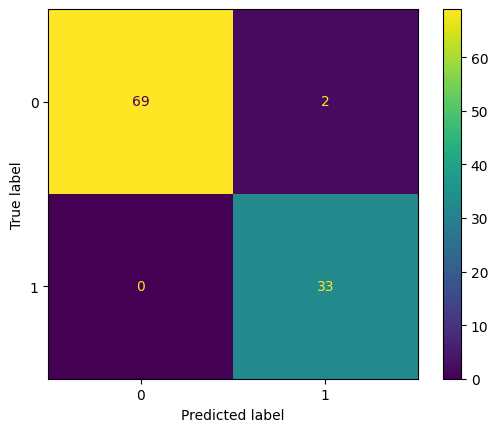

In [44]:
confusion_matrix = [[0, 0],
                    [0, 0]]

for x, y in zip(GBC.predict(X_test), y_test):
    if x == 'Positive' and y == 'Positive':
        confusion_matrix[0][0] += 1
    elif x == 'Negative' and y == 'Negative':
            confusion_matrix[1][1] += 1
    elif x == 'Positive' and y == 'Negative':
        confusion_matrix[1][0] += 1
    else:
        confusion_matrix[0][1] += 1
            
d = ConfusionMatrixDisplay(np.array(confusion_matrix))
d.plot()